# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

*Answer:*
I will be investigating patterns and trends in real estate sales in Connecticut with a focus on understanding the relationship between property types, sales prices, and property assessments. The dataset I will be working with consists of records of real estate sales with a sales price of $2,000 or greater, occurring annually between October 1 and September 30. Each record includes information such as town, property address, sale date, property type (residential, apartment, commercial, industrial, vacant land), sales price, and property assessment. This analysis aims to uncover insights into property market dynamics and assess the accuracy of property assessments relative to sales prices within the given time frame, using data collected in accordance with Connecticut General Statutes.

#### Research Question: What is the property type that has the highest sale ratio (highest profitable property type)?

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmatically into this notebook.

#### **Dataset 1**

Type: *CSV File*

Method: *The data was gathered using the "Downloading files" method from [U.S. General Services Administration source](https://catalog.data.gov/dataset/real-estate-sales-2001-2018).*

Dataset variables:

*   *Serial Number:* A unique number assigned to each property sold in a calendar year for uniformity purposes
*   *List Year:* Year the property was listed for sale
*   *Date Recorded:* Date the sale was recorded locally
*   *Town:* Town name
*   *Address:* Address of the property
*   *Assessed Value:* Value of the property used for local tax assessment
*   *Sale Amount:* Amount the property was sold for
*   *Sales Ratio:* Ratio of the sale price to the assessed value (Sale Amount divided by Assessed Value)
*   *Property Type:* Type of property including Residential, Commercial, Industrial, Apartments, Vacant, etc
*   *Residential Type:* Indicates whether property is single or multifamily residential
*   *NonUse Code:* Non-usable sale code typically means the sale price is not reliable for use in the determination of a property value. [See this pdf file for more information](https://data.ct.gov/api/views/5mzw-sjtu/files/21e4d34e-1117-43dd-a16e-06d9677ecb3f?download=true&filename=Non%20Usable%20Codes.pdf)
*   *Assessor Remarks:* Remarks from the assessor
*   *OPM remarks:* Remarks from the Office of Policy and Management
*   *Location:* Latitude and longitude coordinates of the property

In [1]:
#FILL IN 1st data gathering and loading method
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df_csv = pd.read_csv('Data/Real_Estate_Sales_2001-2020_GL.csv')

# Make a copy of the original dataframe to work with
df_csv_copy = df_csv.copy()

# Take a look at the first few rows of the dataset
df_csv_copy.head()

/var/folders/p4/zzt9glrd7n702xpzdmwyb59r0000gn/T/ipykernel_1379/1044061593.py:8: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_csv = pd.read_csv('Data/Real_Estate_Sales_2001-2020_GL.csv')


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,NaN,NaN,NaN,NaN


#### Dataset 2

Type: *API*

Method: *The data was gathered using the "API" method from [this API URl](https://data.ct.gov/Housing-and-Development/Real-Estate-Sales-2001-2020-GL/5mzw-sjtu) source.*

Dataset variables:


*   *serialnumber:* A unique number assigned to each property sold in a calendar year for uniformity purposes
*   *listyear:* Year the property was listed for sale
*   *daterecorded:* Date the sale was recorded locally
*   *town:* Town name
*   *address:* Address of the property
*   *assessedvalue:* Value of the property used for local tax assessment
*   *saleamount:* Amount the property was sold for
*   *salesratio:* Ratio of the sale price to the assessed value (Sale Amount divided by Assessed Value)
*   *propertytype:* Type of property including Residential, Commercial, Industrial, Apartments, Vacant, etc
*   *residentialtype:* Indicates whether property is single or multifamily residential
*   *nonusecode:* Non-usable sale code typically means the sale price is not reliable for use in the determination of a property value. [See this pdf file for more information](https://data.ct.gov/api/views/5mzw-sjtu/files/21e4d34e-1117-43dd-a16e-06d9677ecb3f?download=true&filename=Non%20Usable%20Codes.pdf)
*   *remarks:* Remarks from the assessor
*   *opm_remarks:* Remarks from the Office of Policy and Management
*   *geo_coordinates:* Latitude and longitude coordinates of the property

In [2]:
#FILL IN 2nd data gathering and loading method
import requests as rq
import json

df_api = rq.get('https://data.ct.gov/resource/5mzw-sjtu.json').json()

# Make a copy of the original dataframe to work with
df_api_copy = df_api.copy()

# Convert the processed data into a DataFrame
df_api_copy = pd.DataFrame.from_records(df_api)

# Take a look at the first few rows of the dataset
df_api_copy[0:4]

,serialnumber,listyear,daterecorded,town,address,assessedvalue,saleamount,salesratio,propertytype,residentialtype,geo_coordinates,:@computed_region_dam5_q64j,:@computed_region_nhmp_cq6b,:@computed_region_m4y2_whse,:@computed_region_snd5_k6zv,nonusecode,remarks,opm_remarks
0,20001,2020,2020-10-05T00:00:00.000,Andover,303 LAKE RD,121300,210000,0.5776,Residential,Single Family,"{'type': 'Point', 'coordinates': [-72.35327, 4...",38,246,1,1,NaN,NaN,NaN
1,20002,2020,2020-10-15T00:00:00.000,Andover,78 WINDRUSH LN,181800,275000,0.661090909,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20003,2020,2020-10-22T00:00:00.000,Andover,203 BOSTON HILL RD,190200,279900,0.6795,Residential,Single Family,"{'type': 'Point', 'coordinates': [-72.39695, 4...",38,246,1,1,NaN,NaN,NaN
3,20004,2020,2020-11-02T00:00:00.000,Andover,23 PARKER BRIDGE RD,172900,272000,0.6356,Residential,Single Family,"{'type': 'Point', 'coordinates': [-72.33558, 4...",38,246,1,1,NaN,NaN,NaN


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [3]:
#Optional: store the raw data in your local data store

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programmatically method to validate the cleaning was successful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.


# In the following cells, I combine the assessing and cleaning phases for each issue.
 The following order has been followed for each issue:
 - identify the issue
   - assess the issue visually and programmatically
     - clean the issue
       - validate and update the cleaning


# Assess and Clean dataset from the CSV file

### Assess the data visually

In [4]:
# First we will take a lock to the first few rows of the dataset to get a feel for the data
df_csv_copy.head(10)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.535400,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.460600,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.629100,Residential,Two Family,NaN,NaN,NaN,NaN
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.544100,Residential,Single Family,NaN,NaN,NaN,NaN
5,200121,2020,12/15/2020,Avon,63 NORTHGATE,528490.0,775000.0,0.681900,Residential,Single Family,NaN,NaN,NaN,POINT (-72.89675 41.79445)
6,20058,2020,06/01/2021,Barkhamsted,46 RATLUM MTN RD,203530.0,415000.0,0.490434,Residential,Single Family,NaN,"2003 COLONIAL, 2140 SFLA, 2.99 AC",NaN,NaN
7,200046,2020,01/25/2021,Beacon Falls,34 LASKY ROAD,158030.0,243000.0,0.650300,Residential,Single Family,NaN,NaN,NaN,NaN
8,200016,2020,11/13/2020,Beacon Falls,9 AVON COURT,65590.0,100000.0,0.655900,Residential,Condo,NaN,NaN,NaN,NaN
9,2020360,2020,08/10/2021,Berlin,94 PERCIVAL AVE,140600.0,190790.0,0.736900,Residential,Single Family,NaN,NaN,NaN,NaN


### Assess the data programmatically

In [5]:
# After looking at the first few rows, we will use .info() function to get a better understanding of the data types and null values
df_csv_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed Value    997213 non-null  float64
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     614767 non-null  object 
 9   Residential Type  608904 non-null  object 
 10  Non Use Code      289681 non-null  object 
 11  Assessor Remarks  149864 non-null  object 
 12  OPM remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 106.5+ MB


We can see from the result of `.info()` function that we have 997213 rows and 15 columns. We can see that there are some null values in some of the columns, the number of null values vary from column to column. For example, the `Date Record` column has only 2 missing values, while the `OPM Remarks` columns have 997213 missing values. <br />
Now, we know that we have missing values in our dataset, so we will examine every column to deeper investigate our data.

In [6]:
# Now we will use .describe() function to get a better understanding of the data.
df_csv_copy.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,9.972130e+05,997213.000000,9.972130e+05,9.972130e+05,9.972130e+05
mean,4.311864e+05,2010.189829,2.791437e+05,3.911512e+05,1.044637e+01
std,6.549219e+06,6.237877,1.670610e+06,5.347270e+06,1.890192e+03
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.044400e+04,2004.000000,8.760000e+04,1.400000e+05,4.867000e-01
50%,7.030300e+04,2010.000000,1.383900e+05,2.250000e+05,6.246000e-01
75%,1.518780e+05,2016.000000,2.255600e+05,3.650000e+05,7.852761e-01
max,2.000500e+09,2020.000000,8.815100e+08,5.000000e+09,1.226420e+06


We can see from the result of `.describe()` function that we have some outliers in the `Assessed Value` column. We can see that the minimum value is 0, which is not possible. <br />
We will investigate this further in the next step.

In [7]:
# review the data
df_csv_copy.head(10)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.535400,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.460600,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.629100,Residential,Two Family,NaN,NaN,NaN,NaN
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.544100,Residential,Single Family,NaN,NaN,NaN,NaN
5,200121,2020,12/15/2020,Avon,63 NORTHGATE,528490.0,775000.0,0.681900,Residential,Single Family,NaN,NaN,NaN,POINT (-72.89675 41.79445)
6,20058,2020,06/01/2021,Barkhamsted,46 RATLUM MTN RD,203530.0,415000.0,0.490434,Residential,Single Family,NaN,"2003 COLONIAL, 2140 SFLA, 2.99 AC",NaN,NaN
7,200046,2020,01/25/2021,Beacon Falls,34 LASKY ROAD,158030.0,243000.0,0.650300,Residential,Single Family,NaN,NaN,NaN,NaN
8,200016,2020,11/13/2020,Beacon Falls,9 AVON COURT,65590.0,100000.0,0.655900,Residential,Condo,NaN,NaN,NaN,NaN
9,2020360,2020,08/10/2021,Berlin,94 PERCIVAL AVE,140600.0,190790.0,0.736900,Residential,Single Family,NaN,NaN,NaN,NaN


#### For Quality issues, we notice the following issues:
##### Data types issues:
- `List Year` column is of type `int64`, but it should be of type `datetime64[ns]`
- `Date Recorded` column is of type `object`, but it should be of type `datetime64[ns]`

##### Missing values issues:
- Locking at the first column `Serial Number`, it supposes to be unique. However, we can see that there are some duplicates because the of issue in the consistently of the data entry.
- Locking at the first column `Property Type` and `Residential Type`, it seems that they are the same column.

##### Outliers issues:
- `Assessed Value` column has outliers

### Quality Issue #1
Looking at the Dtypes of the columns, we can see that the `daterecorded` column is an object, which is not correct.

#### We will convert the `daterecorded` column to datetime.

In [8]:
# Change the data type of the Date Recorded column to be a datetime object
df_csv_copy['Date Recorded'] = pd.to_datetime(df_csv_copy['Date Recorded'])

# check the data type of the Date Recorded column
df_csv_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Serial Number     997213 non-null  int64         
 1   List Year         997213 non-null  int64         
 2   Date Recorded     997211 non-null  datetime64[ns]
 3   Town              997213 non-null  object        
 4   Address           997162 non-null  object        
 5   Assessed Value    997213 non-null  float64       
 6   Sale Amount       997213 non-null  float64       
 7   Sales Ratio       997213 non-null  float64       
 8   Property Type     614767 non-null  object        
 9   Residential Type  608904 non-null  object        
 10  Non Use Code      289681 non-null  object        
 11  Assessor Remarks  149864 non-null  object        
 12  OPM remarks       9934 non-null    object        
 13  Location          197697 non-null  object        
dtypes: d

### Quality Issue #2
Locking at the first column `Serial Number`, it supposes to be unique. However, we can see that there are some duplicates because the of issue in the consistently of the data entry. <br />
The serial number should be 9 digits, but we can see that there are some serial numbers that are less than 9 digits. <br />
The first 4 numbers in the serial number should be the year, but we can see that there are some serial numbers that have the year 0, which is not possible. <br />
The last 5 numbers in the serial number should be unique, but we can see that there are some duplicates.

let's find the length of the values in the Serial Number column visually

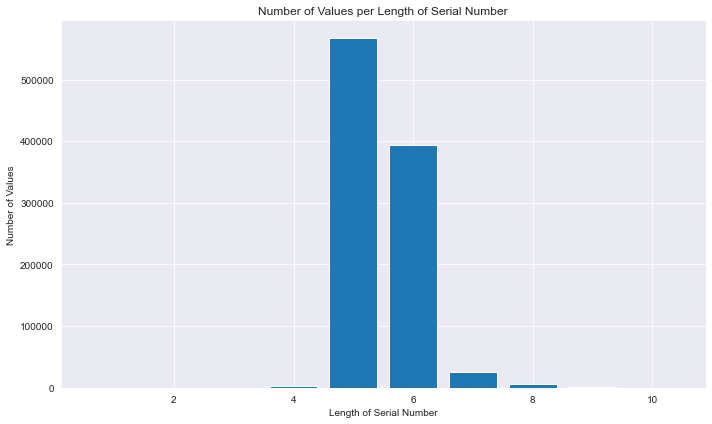

In [9]:
# Get the length of the values in the Serial Number column
length_of_serial_number = df_csv_copy['Serial Number'].astype(str).apply(len)

# Get the number of values for each length of serial number
number_of_values_per_length = length_of_serial_number.value_counts()
plt.figure(figsize=(10, 6))

# Create a bar chart of the number of values for each length of serial number
plt.bar(number_of_values_per_length.index, number_of_values_per_length.values)

# Add a title
plt.title('Number of Values per Length of Serial Number')

# Label the axes
plt.xlabel('Length of Serial Number')
plt.ylabel('Number of Values')

# Show the plot
plt.tight_layout()
plt.show()

#### From the above plot, we can see that the length of the serial number is 9 digits, but there are many serial numbers that are less than 9 digits which is not inconsistent.

let's find the length of the values in the Serial Number column programmatically

In [10]:
# let's find the unique values in the Serial Number column
df_csv_copy.loc[df_csv_copy['Serial Number'].duplicated()]['Serial Number']

56        200192
73        200081
74        200114
127       200030
128       200095
           ...  
997208    190272
997209    190284
997210    190129
997211    190504
997212    190344
Name: Serial Number, Length: 913676, dtype: int64

we can see that the serial number has many duplicates values, and the duplicated values are 913676 values which is more than 90% of the dataset.
#### we will recreate the serial number column to fix the issue, but first we will solve the issue of the missing values in the `Date Recorded` column.

In [11]:
# sort the dataframe by the date recorded column
df_csv_copy.sort_values(by=['Date Recorded'], inplace=True)

# We have two missing values in the Date Recorded column, so we will check these two rows to handle them
df_csv_copy.loc[df_csv_copy['Date Recorded'].isnull()]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
177987,20280,2002,NaT,Orange,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
179479,0,2002,NaT,Orange,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

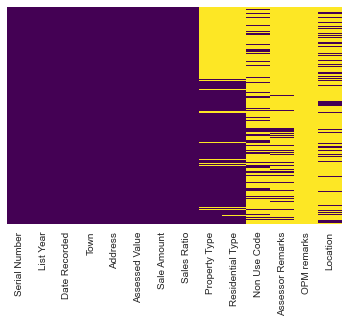

In [12]:
# We can see that these two rows have many missing values, so we will drop them
df_csv_copy.dropna(subset=['Date Recorded'], inplace=True)

# check using seaborn to see if there are null values in the Date Recorded column
sns.heatmap(df_csv_copy.isnull(), yticklabels=False, cbar=False, cmap='viridis')

We can see from the plot that there are no null values in the Date Recorded column. <br />

#### Now, we will recreate the serial number column to fix the issue.

In [13]:
# let us change the serial number column to be as the following: 1st 4 digits are the year, and the last 5 digits are unique numbers starting from 00001

# create a new column for the serial number
df_csv_copy['New Serial Number'] = df_csv_copy['Date Recorded'].dt.year.astype(str) + \
                                   df_csv_copy.groupby(df_csv_copy['Date Recorded'].dt.year.astype(int)) \
                                       .cumcount().add(1).astype(str).str.zfill(5)

# let us check the new serial number column
df_csv_copy.head(10)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,New Serial Number
857905,170177,2017,1999-04-05,New London,184 PEQUOT AVE 309,46690.0,95000.0,0.491400,Condo,Condo,NaN,NaN,NaN,NaN,199900001
878455,173165,2017,2001-08-01,Shelton,19 BLACKBERRY LA,390810.0,635000.0,0.615449,Single Family,Single Family,NaN,NaN,NaN,NaN,200100001
882230,173202,2017,2001-08-23,Shelton,12 BOYSENBERRY LA,427910.0,558000.0,0.766864,Single Family,Single Family,NaN,NaN,NaN,NaN,200100002
389697,60626,2006,2001-09-04,Newington,110 MOYLAN CT,64750.0,88000.0,0.735795,Condo,Condo,NaN,NaN,NaN,POINT (-72.72554 41.7149),200100003
430234,60631,2006,2001-09-05,Newington,48 EVERGREEN RD,166110.0,256000.0,0.648867,Single Family,Single Family,NaN,NaN,NaN,NaN,200100004
410469,60643,2006,2001-09-25,Naugatuck,217 OSBORN RD,183850.0,293711.0,0.625955,Single Family,Single Family,NaN,NaN,NaN,POINT (-73.03061 41.47741),200100005
93008,10001,2001,2001-10-01,Danbury,6 DANIELS DR,187600.0,348500.0,0.538307,NaN,NaN,NaN,NaN,NaN,NaN,200100006
69357,10015,2001,2001-10-01,Bristol,5 VILLAGE ST,98900.0,205000.0,0.482439,NaN,NaN,NaN,NaN,NaN,NaN,200100007
93029,10002,2001,2001-10-01,Farmington,35 LOCUST LN,75600.0,156000.0,0.484615,NaN,NaN,NaN,NaN,NaN,NaN,200100008
116641,10048,2001,2001-10-01,Wethersfield,8 STOCKADE CIR,143500.0,208000.0,0.689904,NaN,NaN,NaN,NaN,NaN,NaN,200100009


In [14]:
# let us check the new serial number column to see if there are any duplicates
df_csv_copy.loc[df_csv_copy['New Serial Number'].duplicated()]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,New Serial Number


In [15]:
# No duplicates, so we will make the new serial number column as the serial number column and drop the new serial number column
df_csv_copy['Serial Number'] = df_csv_copy['New Serial Number']
df_csv_copy.drop(columns=['New Serial Number'], inplace=True)

# change the data type of the serial number column to be int64
df_csv_copy['Serial Number'] = df_csv_copy['Serial Number'].astype(int)

# let us check the new serial number column
df_csv_copy.head(10)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
857905,199900001,2017,1999-04-05,New London,184 PEQUOT AVE 309,46690.0,95000.0,0.491400,Condo,Condo,NaN,NaN,NaN,NaN
878455,200100001,2017,2001-08-01,Shelton,19 BLACKBERRY LA,390810.0,635000.0,0.615449,Single Family,Single Family,NaN,NaN,NaN,NaN
882230,200100002,2017,2001-08-23,Shelton,12 BOYSENBERRY LA,427910.0,558000.0,0.766864,Single Family,Single Family,NaN,NaN,NaN,NaN
389697,200100003,2006,2001-09-04,Newington,110 MOYLAN CT,64750.0,88000.0,0.735795,Condo,Condo,NaN,NaN,NaN,POINT (-72.72554 41.7149)
430234,200100004,2006,2001-09-05,Newington,48 EVERGREEN RD,166110.0,256000.0,0.648867,Single Family,Single Family,NaN,NaN,NaN,NaN
410469,200100005,2006,2001-09-25,Naugatuck,217 OSBORN RD,183850.0,293711.0,0.625955,Single Family,Single Family,NaN,NaN,NaN,POINT (-73.03061 41.47741)
93008,200100006,2001,2001-10-01,Danbury,6 DANIELS DR,187600.0,348500.0,0.538307,NaN,NaN,NaN,NaN,NaN,NaN
69357,200100007,2001,2001-10-01,Bristol,5 VILLAGE ST,98900.0,205000.0,0.482439,NaN,NaN,NaN,NaN,NaN,NaN
93029,200100008,2001,2001-10-01,Farmington,35 LOCUST LN,75600.0,156000.0,0.484615,NaN,NaN,NaN,NaN,NaN,NaN
116641,200100009,2001,2001-10-01,Wethersfield,8 STOCKADE CIR,143500.0,208000.0,0.689904,NaN,NaN,NaN,NaN,NaN,NaN


### Quality Issue #3
Looking at the `Assessed Value` column, we can see that there are some outliers. <br />

#### We will investigate this further in the next step and decide weather to drop them or not.

<AxesSubplot:xlabel='Assessed Value'>

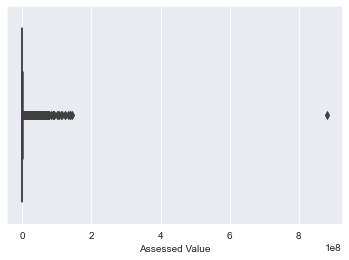

In [16]:
# check the outliers in the Assessed Value column
sns.boxplot(x=df_csv_copy['Assessed Value'])

In [17]:
# We can see that there are some outliers, so we will check the rows with Assessed Value >= 100000000
df_csv_copy.loc[df_csv_copy['Assessed Value'] >= 100000000]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
390451,200701328,2006,2007-01-12,Greenwich,EAST PUTNAM AVE,122935400.0,181700000.0,0.676584,NaN,NaN,03 - Inter Corporation,PART INT,NaN,NaN
430053,200701341,2006,2007-01-12,Greenwich,EAST PUTNAM AVE,122935400.0,48300000.0,2.545246,NaN,NaN,08 - Part Interest,NaN,NaN,NaN
547343,201110076,2010,2011-05-11,Hamden,642 NEWHALL ST,110670208.0,208900.0,529.776008,Single Family,Single Family,NaN,NaN,NaN,NaN
780904,201539563,2015,2015-10-19,Suffield,TAINTOR ST,138958820.0,90096.0,1542.341724,NaN,NaN,19 - Easement,TENNESSEE GAS PIPELINE,NaN,NaN
759303,201539602,2015,2015-10-19,Suffield,TAINTOR ST,138958820.0,40356.0,3443.324908,NaN,NaN,19 - Easement,TENNESSEE GAS PIPELINE,NaN,NaN
797866,201539712,2015,2015-10-19,Suffield,TAINTOR ST,138958820.0,45319.0,3066.237560,NaN,NaN,19 - Easement,TENNESSEE GAS PIPELINE,NaN,NaN
813482,201640294,2016,2016-11-07,Greenwich,51 WEAVER ST,103207510.0,130000000.0,0.793904,NaN,NaN,NaN,NaN,NaN,POINT (-73.64985 41.01941)
811137,201646310,2016,2016-12-21,New Britain,100 GRAND ST,131072830.0,120000.0,1092.273583,NaN,NaN,06 - Portion of Property,NaN,NaN,POINT (-72.78663 41.66208)
846904,201828408,2017,2018-08-15,Hamden,42 WARNER ST,881510000.0,4680000.0,188.356800,Condo,Condo,25 - Other,655 FITCH ST; SALE INCLUDES 25 CONDOS,NaN,NaN
921572,201918759,2018,2019-06-04,Stamford,600 WASHINGTON BLVD,105438300.0,163000000.0,0.646800,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# We can see that there are some outliers, so we will check the rows with Assessed Value = 0
df_csv_copy.loc[df_csv_copy['Assessed Value'] == 0]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
72984,200100530,2001,2001-10-01,Bloomfield,208 DUNCASTER RD,0.0,375000.0,0.0,NaN,NaN,8,NaN,NaN,NaN
71601,200100582,2001,2001-10-01,East Haven,130 COE AVE,0.0,17000.0,0.0,NaN,NaN,25,NaN,NaN,NaN
106357,200100650,2001,2001-10-02,Stratford,SUCCESS VLG,0.0,18000.0,0.0,NaN,NaN,24,NaN,NaN,NaN
104282,200100787,2001,2001-10-02,Stratford,1155 SUCCESS AVE,0.0,33000.0,0.0,NaN,NaN,25,NaN,NaN,NaN
95666,200100849,2001,2001-10-02,Stratford,60 HORTENSE ST LT 2,0.0,0.0,0.0,NaN,NaN,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3312,202146863,2020,2021-09-22,Beacon Falls,2 BAYBERRY COURT,0.0,519900.0,0.0,Residential,Condo,07 - Change in Property,New Construction,NaN,NaN
14008,202146879,2020,2021-09-22,Groton,3 WATER ST UNIT 204,0.0,590000.0,0.0,Residential,Condo,07 - Change in Property,NEW CONSTRUCTION,NaN,NaN
9882,202147134,2020,2021-09-23,Groton,3 WATER ST UNIT 303,0.0,850000.0,0.0,Residential,Condo,07 - Change in Property,NEW CONSTRUCTION,NaN,POINT (-71.97138 41.35421)
22721,202147191,2020,2021-09-24,Groton,3 WATER ST UNIT 404,0.0,1400001.0,0.0,Residential,Condo,07 - Change in Property,new construction,NaN,POINT (-71.97138 41.35421)


#### We can see that there are many rows with `Sale Amount` = 0, so we need to investigate this further
#### let us check the rows with `Sale Amount` = 0 and `Non Use Code` is not null to see if there is a relation between them

In [19]:
# check the rows with Sale Amount = 0 and Non Use Code is not null
df_csv_copy.loc[(df_csv_copy['Sale Amount'] == 0) & (~df_csv_copy['Non Use Code'].isnull())]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
94398,200100376,2001,2001-10-01,Hartford,190 TOWER AVE,66780.0,0.0,0.0,NaN,NaN,25,NaN,NaN,NaN
118116,200100703,2001,2001-10-02,Stratford,161 ALLENCREST DR,126200.0,0.0,0.0,NaN,NaN,1,NaN,NaN,NaN
102141,200100720,2001,2001-10-02,Stratford,372 WAKELEE AVE,124840.0,0.0,0.0,NaN,NaN,1,NaN,NaN,POINT (-73.12165 41.21034)
111943,200100782,2001,2001-10-02,Stratford,66 HORTENSE ST LT 1,85000.0,0.0,0.0,NaN,NaN,4,NaN,NaN,NaN
114746,200100825,2001,2001-10-02,Stratford,105-107 CLOVER ST,144640.0,0.0,0.0,NaN,NaN,8,NaN,NaN,POINT (-73.15251 41.19432)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893710,201840457,2018,2018-11-09,Berlin,1275 WORTHINGTON RIDGE,112000.0,0.0,0.0,Single Family,Single Family,29 - No Consideration,non-qualified sale,NaN,NaN
896598,201841109,2018,2018-11-15,Berlin,127 WETHERSFIELD ROAD,157100.0,0.0,0.0,Single Family,Single Family,29 - No Consideration,non-qualified sale,NaN,NaN
894866,201841431,2018,2018-11-19,Berlin,218 BROOKE MEADOW ROAD,231000.0,0.0,0.0,Single Family,Single Family,29 - No Consideration,non-qualified sale,NaN,POINT (-72.8027 41.61026)
890944,201841662,2018,2018-11-19,Berlin,218 BROOKE MEADOW ROAD,231000.0,0.0,0.0,Single Family,Single Family,29 - No Consideration,non-qualified sale,NaN,POINT (-72.8027 41.61026)


In [20]:
# check the rows with Sale Amount = 0 and Non Use Code is null
df_csv_copy.loc[(df_csv_copy['Sale Amount'] == 0) & (df_csv_copy['Non Use Code'].isnull())]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
927201,201834752,2018,2018-10-01,Burlington,219 COVEY RD,164010.0,0.0,0.0,Single Family,Single Family,NaN,SENDING SALES VERIFICATION,NaN,NaN


We can see that there are many rows with `Sale Amount` = 0 and `Non Use Code` is not null, and this is because they have a reason which is in the `Non Use Code`, so they will not be dropped.<br />


one row with `Sale Amount` = 0 and `Non Use Code` is null. however, we will not drop it because it has a reason which is in the `Assessor Remarks` column which tell us that the sales verification is pending. As a result, we will take the average `Sales Ratio` of this row Town, and we will apply it to the `Assessed Value` in order to get the approximate `Sales Amount`  <br />

In [21]:
# find the row with Sale Amount = 0 and Non Use Code is null
tmp_row = df_csv_copy.loc[(df_csv_copy['Sale Amount'] == 0) & (df_csv_copy['Non Use Code'].isnull())]

# find the average Sales Ratio of this row Town
avg_sales_ratio = df_csv_copy.loc[
    (df_csv_copy['Town'] == tmp_row['Town'].values[0]) & (df_csv_copy['Sale Amount'] != 0), 'Sales Ratio'].mean()

# apply the average Sales Ratio to the Assessed Value to get the approximate Sales Amount
df_csv_copy.loc[(df_csv_copy['Serial Number'] == tmp_row['Serial Number'].values[0]), 'Sale Amount'] = \
    df_csv_copy.loc[
        (df_csv_copy['Serial Number'] == tmp_row['Serial Number'].values[0]), 'Assessed Value'] * avg_sales_ratio

# update the Sale Ratio
df_csv_copy.loc[(df_csv_copy['Serial Number'] == tmp_row['Serial Number'].values[0]), 'Sales Ratio'] = df_csv_copy.loc[(
        df_csv_copy['Serial Number'] == tmp_row['Serial Number'].values[0]), 'Assessed Value'] / df_csv_copy.loc[(
        df_csv_copy['Serial Number'] == tmp_row['Serial Number'].values[0]), 'Sale Amount']

# check the row with Sale Amount = 0 and Non Use Code is null
df_csv_copy.loc[(df_csv_copy['Serial Number'] == tmp_row['Serial Number'].values[0])]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
927201,201834752,2018,2018-10-01,Burlington,219 COVEY RD,164010.0,145539.745028,1.126909,Single Family,Single Family,NaN,SENDING SALES VERIFICATION,NaN,NaN


### Quality Issue #4
Locking at the first column `Property Type` and `Residential Type`, it seems that they are the same column. <br />
#### We will investigate this further in the next step and decide weather to merge them or not.

In [22]:
# check the rows with Property Type =! Residential
df_csv_copy.loc[(df_csv_copy['Property Type'] != df_csv_copy['Residential Type']) &
                (~df_csv_copy['Residential Type'].isnull()) &
                (~df_csv_copy['Property Type'].isnull())]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
25089,202044384,2020,2020-10-01,Colchester,72 CATO CORNER RD,178300.0,300000.0,0.594300,Residential,Single Family,NaN,NaN,NaN,NaN
33507,202044385,2020,2020-10-01,Shelton,77 LAKEVIEW AVE,110810.0,205000.0,0.540500,Residential,Single Family,NaN,NaN,NaN,POINT (-73.1038 41.3221)
19844,202044386,2020,2020-10-01,Brookfield,3 FLEETWOOD LN,240920.0,287500.0,0.837900,Residential,Single Family,25 - Other,MOVED TO SOUTHBURY TOOK FIRST OFFER NO REALTOR...,NaN,POINT (-73.33855 41.47137)
63351,202044387,2020,2020-10-01,Washington,167 CHURCH HILL RD,1006380.0,1010000.0,0.996400,Residential,Single Family,NaN,NaN,NaN,NaN
8521,202044388,2020,2020-10-01,Ansonia,75 JEWETT ST,115700.0,165000.0,0.701212,Residential,Two Family,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24429,202148436,2020,2021-09-30,Bethel,1 EAGLE ROCK ROAD,118440.0,275000.0,0.430600,Residential,Condo,NaN,NaN,NaN,NaN
24433,202148437,2020,2021-09-30,East Granby,1 KIRKSTONE,72800.0,475000.0,0.153200,Residential,Single Family,07 - Change in Property,NEW SINGLE FAMILY DWELLING,NaN,POINT (-72.75001 41.94244)
38638,202148439,2020,2021-09-30,Norwich,180 PALMER ST EXT,78300.0,149000.0,0.525500,Residential,Two Family,NaN,NaN,NaN,POINT (-72.05776 41.51904)
36216,202148440,2020,2021-09-30,New Fairfield,9 MUSKET RIDGE RD,276700.0,600000.0,0.461100,Residential,Single Family,NaN,NaN,NaN,NaN


From the result, we can see that there are many rows that have different values in the `Property Type` and `Residential Type` columns. So we will not merge them.<br />
#### However, this will be considered as a Tidiness Issue now.

### Tidiness Issue #1
#### From the result, we can see that there are many rows that have different values in the `Property Type` and `Residential Type` columns. So we will not merge them.<br />
#### However, we will drop the rows with missing values `Residential Type` and `Property Type` columns because they have more than 30% missing values.

In [23]:
# Drop the rows with missing values in the Residential Type and Property Type columns
df_csv_copy.dropna(subset=['Residential Type', 'Property Type'], inplace=True)

# check the dataframe
df_csv_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608904 entries, 857905 to 16188
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Serial Number     608904 non-null  int64         
 1   List Year         608904 non-null  int64         
 2   Date Recorded     608904 non-null  datetime64[ns]
 3   Town              608904 non-null  object        
 4   Address           608900 non-null  object        
 5   Assessed Value    608904 non-null  float64       
 6   Sale Amount       608904 non-null  float64       
 7   Sales Ratio       608904 non-null  float64       
 8   Property Type     608904 non-null  object        
 9   Residential Type  608904 non-null  object        
 10  Non Use Code      182400 non-null  object        
 11  Assessor Remarks  125627 non-null  object        
 12  OPM remarks       9022 non-null    object        
 13  Location          123755 non-null  object        
dtype

### Tidiness Issue #2
The columns name are not following the rules of the tidy data. <br />
#### We will rename the columns to follow the rules of the tidy data.

In [24]:
# Change the columns names to lower case and replace the spaces with underscore
df_csv_copy.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# check the columns names
df_csv_copy.columns

Index(['serial_number', 'list_year', 'date_recorded', 'town', 'address',
       'assessed_value', 'sale_amount', 'sales_ratio', 'property_type',
       'residential_type', 'non_use_code', 'assessor_remarks', 'opm_remarks',
       'location'],
      dtype='object')

In [25]:
# let us reset the index of the dataframe
df_csv_copy.reset_index(drop=True, inplace=True)

# check the dataframe
df_csv_copy.head()

,serial_number,list_year,date_recorded,town,address,assessed_value,sale_amount,sales_ratio,property_type,residential_type,non_use_code,assessor_remarks,opm_remarks,location
0,199900001,2017,1999-04-05,New London,184 PEQUOT AVE 309,46690.0,95000.0,0.491400,Condo,Condo,NaN,NaN,NaN,NaN
1,200100001,2017,2001-08-01,Shelton,19 BLACKBERRY LA,390810.0,635000.0,0.615449,Single Family,Single Family,NaN,NaN,NaN,NaN
2,200100002,2017,2001-08-23,Shelton,12 BOYSENBERRY LA,427910.0,558000.0,0.766864,Single Family,Single Family,NaN,NaN,NaN,NaN
3,200100003,2006,2001-09-04,Newington,110 MOYLAN CT,64750.0,88000.0,0.735795,Condo,Condo,NaN,NaN,NaN,POINT (-72.72554 41.7149)
4,200100004,2006,2001-09-05,Newington,48 EVERGREEN RD,166110.0,256000.0,0.648867,Single Family,Single Family,NaN,NaN,NaN,NaN


#### After we have cleaned the data, we will check if there are any duplicated rows

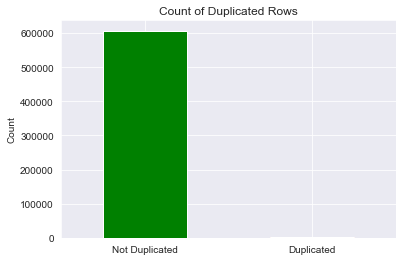

Number of exact duplicated rows: False    606782
True       2122
dtype: int64


In [26]:
# let us check if there are any exact-duplicated rows, we will ignore the serial number column because it is unique
df_csv_copy.duplicated(subset=df_csv_copy.columns.difference(['serial_number'])).sum()

# Plot the number of duplicated rows
duplicated_counts = df_csv_copy.duplicated(subset=df_csv_copy.columns.difference(['serial_number'])).value_counts()
duplicated_counts.plot(kind='bar', color=['green', 'red'])

plt.ylabel('Count')
plt.title('Count of Duplicated Rows')
plt.xticks([0, 1], ['Not Duplicated', 'Duplicated'], rotation=0)
plt.show()

print(f"Number of exact duplicated rows: {duplicated_counts}")

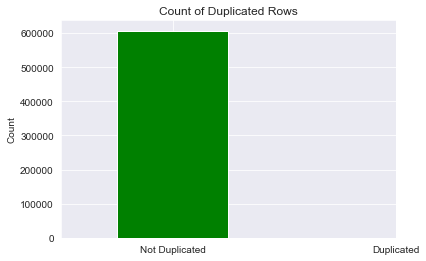

Number of exact duplicated rows: False    606782
dtype: int64


In [27]:
# delete the duplicated rows
df_csv_copy.drop_duplicates(subset=df_csv_copy.columns.difference(['serial_number']), inplace=True)

# validate that there are no duplicated rows using visual assessment
duplicated_counts = df_csv_copy.duplicated(subset=df_csv_copy.columns.difference(['serial_number'])).value_counts()
duplicated_counts.plot(kind='bar', color=['green', 'red'])

plt.ylabel('Count')
plt.title('Count of Duplicated Rows')
plt.xticks([0, 1], ['Not Duplicated', 'Duplicated'], rotation=0)
plt.show()

print(f"Number of exact duplicated rows: {duplicated_counts}")

# Assess and Clean dataset from the API
## Now we will assess and clean the dataset from the API

### Assess the data visually

In [28]:
df_api_copy.head(10)

,serialnumber,listyear,daterecorded,town,address,assessedvalue,saleamount,salesratio,propertytype,residentialtype,geo_coordinates,:@computed_region_dam5_q64j,:@computed_region_nhmp_cq6b,:@computed_region_m4y2_whse,:@computed_region_snd5_k6zv,nonusecode,remarks,opm_remarks
0,20001,2020,2020-10-05T00:00:00.000,Andover,303 LAKE RD,121300,210000,0.5776,Residential,Single Family,"{'type': 'Point', 'coordinates': [-72.35327, 4...",38,246,1,1,NaN,NaN,NaN
1,20002,2020,2020-10-15T00:00:00.000,Andover,78 WINDRUSH LN,181800,275000,0.661090909,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20003,2020,2020-10-22T00:00:00.000,Andover,203 BOSTON HILL RD,190200,279900,0.6795,Residential,Single Family,"{'type': 'Point', 'coordinates': [-72.39695, 4...",38,246,1,1,NaN,NaN,NaN
3,20004,2020,2020-11-02T00:00:00.000,Andover,23 PARKER BRIDGE RD,172900,272000,0.6356,Residential,Single Family,"{'type': 'Point', 'coordinates': [-72.33558, 4...",38,246,1,1,NaN,NaN,NaN
4,20005,2020,2020-11-09T00:00:00.000,Andover,181 LONG HILL RD,152800,255000,0.5992,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20006,2020,2020-11-23T00:00:00.000,Andover,147 WHEELING RD,143200,285000,0.5024,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,20007,2020,2020-11-23T00:00:00.000,Andover,35 OLD FARMS RD,232600,347900,0.6685,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,20008,2020,2020-12-01T00:00:00.000,Andover,40 RIDGE RD,186000,270000,0.6888,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20009,2020,2020-12-01T00:00:00.000,Andover,12 WEBSTER LN BOLTON,2700,67269,0.040137359,Vacant Land,NaN,"{'type': 'Point', 'coordinates': [-72.42136, 4...",38,209,1,1,17 - Two Towns,THIS IS A 2 TOWN PROPERTY IN BOLTON AND ANDOVER,NaN
9,20010,2020,2020-12-02T00:00:00.000,Andover,3 GILEAD RD,151700,271000,0.5597,Residential,Single Family,"{'type': 'Point', 'coordinates': [-72.37228, 4...",38,246,1,1,NaN,NaN,NaN


### Assess the data programmatically

In [29]:
df_api_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   serialnumber                 1000 non-null   object
 1   listyear                     1000 non-null   object
 2   daterecorded                 1000 non-null   object
 3   town                         1000 non-null   object
 4   address                      1000 non-null   object
 5   assessedvalue                1000 non-null   object
 6   saleamount                   1000 non-null   object
 7   salesratio                   1000 non-null   object
 8   propertytype                 1000 non-null   object
 9   residentialtype              929 non-null    object
 10  geo_coordinates              481 non-null    object
 11  :@computed_region_dam5_q64j  481 non-null    object
 12  :@computed_region_nhmp_cq6b  481 non-null    object
 13  :@computed_region_m4y2_whse  481 n

We can see from the results above that the `geo_coordinates` and `listyear` didn't convert correctly from the Json format. Also, there are 4 columns with no meaning and have above 50% of missing values which are `:@computed_region_dam5_q64j`, `:@computed_region_nhmp_cq6b`, `:@computed_region_m4y2_whse`, and `:@computed_region_snd5_k6zv`.
#### Now, we will investigate and assess the dataset further.

In [30]:
# review the data
df_api_copy.head(10)

,serialnumber,listyear,daterecorded,town,address,assessedvalue,saleamount,salesratio,propertytype,residentialtype,geo_coordinates,:@computed_region_dam5_q64j,:@computed_region_nhmp_cq6b,:@computed_region_m4y2_whse,:@computed_region_snd5_k6zv,nonusecode,remarks,opm_remarks
0,20001,2020,2020-10-05T00:00:00.000,Andover,303 LAKE RD,121300,210000,0.5776,Residential,Single Family,"{'type': 'Point', 'coordinates': [-72.35327, 4...",38,246,1,1,NaN,NaN,NaN
1,20002,2020,2020-10-15T00:00:00.000,Andover,78 WINDRUSH LN,181800,275000,0.661090909,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20003,2020,2020-10-22T00:00:00.000,Andover,203 BOSTON HILL RD,190200,279900,0.6795,Residential,Single Family,"{'type': 'Point', 'coordinates': [-72.39695, 4...",38,246,1,1,NaN,NaN,NaN
3,20004,2020,2020-11-02T00:00:00.000,Andover,23 PARKER BRIDGE RD,172900,272000,0.6356,Residential,Single Family,"{'type': 'Point', 'coordinates': [-72.33558, 4...",38,246,1,1,NaN,NaN,NaN
4,20005,2020,2020-11-09T00:00:00.000,Andover,181 LONG HILL RD,152800,255000,0.5992,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20006,2020,2020-11-23T00:00:00.000,Andover,147 WHEELING RD,143200,285000,0.5024,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,20007,2020,2020-11-23T00:00:00.000,Andover,35 OLD FARMS RD,232600,347900,0.6685,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,20008,2020,2020-12-01T00:00:00.000,Andover,40 RIDGE RD,186000,270000,0.6888,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20009,2020,2020-12-01T00:00:00.000,Andover,12 WEBSTER LN BOLTON,2700,67269,0.040137359,Vacant Land,NaN,"{'type': 'Point', 'coordinates': [-72.42136, 4...",38,209,1,1,17 - Two Towns,THIS IS A 2 TOWN PROPERTY IN BOLTON AND ANDOVER,NaN
9,20010,2020,2020-12-02T00:00:00.000,Andover,3 GILEAD RD,151700,271000,0.5597,Residential,Single Family,"{'type': 'Point', 'coordinates': [-72.37228, 4...",38,246,1,1,NaN,NaN,NaN


#### For Quality issues, we notice the following issues:

1- Locking at the first column `Serial Number`, it supposes to be unique. However, we can see that there are some duplicates because the of issue in the consistently of the data entry. <br />

2- `geo_coordinates` column didn't convert correctly from the Json format, we need to convert it correctly.<br />

3- Four columns with no meaning and have above 90% of missing values which are `:@computed_region_dam5_q64j`, `:@computed_region_nhmp_cq6b`, `:@computed_region_m4y2_whse`, and `:@computed_region_snd5_k6zv`, we need to drop them.<br />


### Quality Issue #1
Looking at the Dtypes of the columns, we can see that the `daterecorded` column is an object, which is not correct.

#### We will convert the `daterecorded` column to datetime.

In [31]:
# convert the daterecorded column to datetime
df_api_copy['daterecorded'] = pd.to_datetime(df_api_copy['daterecorded'])

# check the data type of the daterecorded
df_api_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   serialnumber                 1000 non-null   object        
 1   listyear                     1000 non-null   object        
 2   daterecorded                 1000 non-null   datetime64[ns]
 3   town                         1000 non-null   object        
 4   address                      1000 non-null   object        
 5   assessedvalue                1000 non-null   object        
 6   saleamount                   1000 non-null   object        
 7   salesratio                   1000 non-null   object        
 8   propertytype                 1000 non-null   object        
 9   residentialtype              929 non-null    object        
 10  geo_coordinates              481 non-null    object        
 11  :@computed_region_dam5_q64j  481 non-null   

In [32]:
# validate the Date Recorded column
df_api_copy['daterecorded'].head(10)

0   2020-10-05
1   2020-10-15
2   2020-10-22
3   2020-11-02
4   2020-11-09
5   2020-11-23
6   2020-11-23
7   2020-12-01
8   2020-12-01
9   2020-12-02
Name: daterecorded, dtype: datetime64[ns]

### Quality Issue #2
Locking at the first column Serial Number, it supposes to be unique. However, we can see that there are some duplicates because the of issue in the consistently of the data entry.
The serial number should be 9 digits, but we can see that there are some serial numbers that are less than 9 digits.
The first 4 numbers in the serial number should be the year, but we can see that there are some serial numbers that have the year 0, which is not possible.
The last 5 numbers in the serial number should be unique, but we can see that there are some duplicates.

#### We will investigate this further in the next step and decide weather to drop them or not.

In [33]:
# check the unique data serial number column
df_api_copy['serialnumber'].unique()[0:20]

array(['20001', '20002', '20003', '20004', '20005', '20006', '20007',
       '20008', '20009', '20010', '20012', '20011', '20013', '20014',
       '20015', '20016', '20017', '20018', '20020', '20019'], dtype=object)

We can see from the result above that there are some serial numbers that are less than 9 digits and some serial numbers that have the year 0, which is not possible.

<BarContainer object of 2 artists>

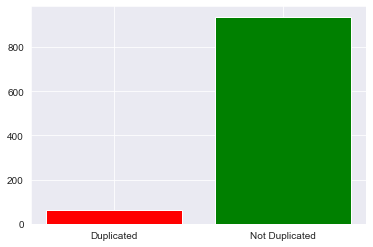

In [34]:
# check the duplicate data serial number column
duplicated_serial_api = df_api_copy['serialnumber'].duplicated().sum()

# plot sow how many duplicated value in the serialnumber column
plt.bar(['Duplicated', 'Not Duplicated'],
        [duplicated_serial_api, len(df_api_copy['serialnumber']) - duplicated_serial_api], color=['red', 'green'])

We can see from the result above that there are some duplicates in the serial number column.

### Now, we will recreate the serial number column to fix the issue.

In [35]:
# let us change the serial number column to be as the following: 1st 4 digits are the year, and the last 5 digits are unique numbers starting from 00001

# create a new column for the serial number
df_api_copy['new_serial_number'] = df_api_copy['daterecorded'].dt.year.astype(str) + \
                                   df_api_copy.groupby(df_api_copy['daterecorded'].dt.year.astype(int)) \
                                       .cumcount().add(1).astype(str).str.zfill(5)

# let us check the new serial number column
df_api_copy.head(10)

,serialnumber,listyear,daterecorded,town,address,assessedvalue,saleamount,salesratio,propertytype,residentialtype,geo_coordinates,:@computed_region_dam5_q64j,:@computed_region_nhmp_cq6b,:@computed_region_m4y2_whse,:@computed_region_snd5_k6zv,nonusecode,remarks,opm_remarks,new_serial_number
0,20001,2020,2020-10-05,Andover,303 LAKE RD,121300,210000,0.5776,Residential,Single Family,"{'type': 'Point', 'coordinates': [-72.35327, 4...",38,246,1,1,NaN,NaN,NaN,202000001
1,20002,2020,2020-10-15,Andover,78 WINDRUSH LN,181800,275000,0.661090909,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202000002
2,20003,2020,2020-10-22,Andover,203 BOSTON HILL RD,190200,279900,0.6795,Residential,Single Family,"{'type': 'Point', 'coordinates': [-72.39695, 4...",38,246,1,1,NaN,NaN,NaN,202000003
3,20004,2020,2020-11-02,Andover,23 PARKER BRIDGE RD,172900,272000,0.6356,Residential,Single Family,"{'type': 'Point', 'coordinates': [-72.33558, 4...",38,246,1,1,NaN,NaN,NaN,202000004
4,20005,2020,2020-11-09,Andover,181 LONG HILL RD,152800,255000,0.5992,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202000005
5,20006,2020,2020-11-23,Andover,147 WHEELING RD,143200,285000,0.5024,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202000006
6,20007,2020,2020-11-23,Andover,35 OLD FARMS RD,232600,347900,0.6685,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202000007
7,20008,2020,2020-12-01,Andover,40 RIDGE RD,186000,270000,0.6888,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202000008
8,20009,2020,2020-12-01,Andover,12 WEBSTER LN BOLTON,2700,67269,0.040137359,Vacant Land,NaN,"{'type': 'Point', 'coordinates': [-72.42136, 4...",38,209,1,1,17 - Two Towns,THIS IS A 2 TOWN PROPERTY IN BOLTON AND ANDOVER,NaN,202000009
9,20010,2020,2020-12-02,Andover,3 GILEAD RD,151700,271000,0.5597,Residential,Single Family,"{'type': 'Point', 'coordinates': [-72.37228, 4...",38,246,1,1,NaN,NaN,NaN,202000010


In [36]:
# let us check the new serial number column to see if there are any duplicates
df_api_copy.loc[df_api_copy['new_serial_number'].duplicated()]

,serialnumber,listyear,daterecorded,town,address,assessedvalue,saleamount,salesratio,propertytype,residentialtype,geo_coordinates,:@computed_region_dam5_q64j,:@computed_region_nhmp_cq6b,:@computed_region_m4y2_whse,:@computed_region_snd5_k6zv,nonusecode,remarks,opm_remarks,new_serial_number


In [37]:
# No duplicates, so we will make the new serial number column as the serial number column and drop the new serial number column
df_api_copy['serialnumber'] = df_api_copy['new_serial_number']
df_api_copy.drop(columns=['new_serial_number'], inplace=True)

# change the data type of the serial number column to be int64
df_api_copy['serialnumber'] = df_api_copy['serialnumber'].astype(int)

# let us check the new serial number column
df_api_copy.head(10)

,serialnumber,listyear,daterecorded,town,address,assessedvalue,saleamount,salesratio,propertytype,residentialtype,geo_coordinates,:@computed_region_dam5_q64j,:@computed_region_nhmp_cq6b,:@computed_region_m4y2_whse,:@computed_region_snd5_k6zv,nonusecode,remarks,opm_remarks
0,202000001,2020,2020-10-05,Andover,303 LAKE RD,121300,210000,0.5776,Residential,Single Family,"{'type': 'Point', 'coordinates': [-72.35327, 4...",38,246,1,1,NaN,NaN,NaN
1,202000002,2020,2020-10-15,Andover,78 WINDRUSH LN,181800,275000,0.661090909,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202000003,2020,2020-10-22,Andover,203 BOSTON HILL RD,190200,279900,0.6795,Residential,Single Family,"{'type': 'Point', 'coordinates': [-72.39695, 4...",38,246,1,1,NaN,NaN,NaN
3,202000004,2020,2020-11-02,Andover,23 PARKER BRIDGE RD,172900,272000,0.6356,Residential,Single Family,"{'type': 'Point', 'coordinates': [-72.33558, 4...",38,246,1,1,NaN,NaN,NaN
4,202000005,2020,2020-11-09,Andover,181 LONG HILL RD,152800,255000,0.5992,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,202000006,2020,2020-11-23,Andover,147 WHEELING RD,143200,285000,0.5024,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,202000007,2020,2020-11-23,Andover,35 OLD FARMS RD,232600,347900,0.6685,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,202000008,2020,2020-12-01,Andover,40 RIDGE RD,186000,270000,0.6888,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,202000009,2020,2020-12-01,Andover,12 WEBSTER LN BOLTON,2700,67269,0.040137359,Vacant Land,NaN,"{'type': 'Point', 'coordinates': [-72.42136, 4...",38,209,1,1,17 - Two Towns,THIS IS A 2 TOWN PROPERTY IN BOLTON AND ANDOVER,NaN
9,202000010,2020,2020-12-02,Andover,3 GILEAD RD,151700,271000,0.5597,Residential,Single Family,"{'type': 'Point', 'coordinates': [-72.37228, 4...",38,246,1,1,NaN,NaN,NaN


#### Validate the changes to the serial number column

<BarContainer object of 2 artists>

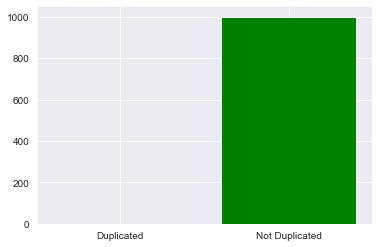

In [38]:
# plot sow how many duplicated value in the serialnumber column
plt.bar(['Duplicated', 'Not Duplicated'], [df_api_copy['serialnumber'].duplicated().sum(),
                                           len(df_api_copy['serialnumber']) - df_api_copy[
                                               'serialnumber'].duplicated().sum()], color=['red', 'green'])

### Quality Issue #3
Four columns with no meaning and have above 90% of missing values which are `:@computed_region_dam5_q64j`, `:@computed_region_nhmp_cq6b`, `:@computed_region_m4y2_whse`, and `:@computed_region_snd5_k6zv`, we need to drop them.<br />

#### We will investigate this further in the next step and decide weather to drop them or not.

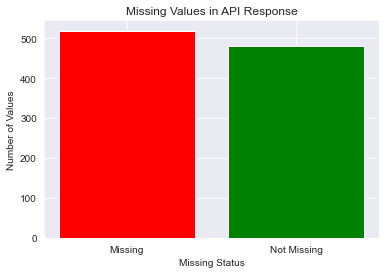

In [39]:
# check the missing values in the dataset for the following columns: @computed_region_dam5_q64j, @computed_region_nhmp_cq6b, @computed_region_m4y2_whse, and @computed_region_snd5_k6zv

# Calculate the count of missing values in the dataset [since we know from .info() that the number of null values is the same for all columns, we will just use one column]
missing_values_api = df_api_copy[':@computed_region_dam5_q64j'].isnull().sum()

# Calculate the count of not missing values in the dataset
not_missing_values = len(df_api_copy) - missing_values_api

# Create a bar chart to show the missing and not missing values
plt.bar(['Missing', 'Not Missing'], [missing_values_api.sum(), not_missing_values.sum()], color=['red', 'green'])

# Label the axes
plt.xlabel('Missing Status')
plt.ylabel('Number of Values')

# Add a title
plt.title('Missing Values in API Response')

# Show the plot
plt.show()

In [40]:
# drop the following columns: @computed_region_dam5_q64j, @computed_region_nhmp_cq6b, @computed_region_m4y2_whse, and @computed_region_snd5_k6zv
df_api_copy.drop(columns=[':@computed_region_dam5_q64j', ':@computed_region_nhmp_cq6b', ':@computed_region_m4y2_whse',
                          ':@computed_region_snd5_k6zv'], inplace=True)

# let us check the dataset after dropping the columns
df_api_copy.head(10)

,serialnumber,listyear,daterecorded,town,address,assessedvalue,saleamount,salesratio,propertytype,residentialtype,geo_coordinates,nonusecode,remarks,opm_remarks
0,202000001,2020,2020-10-05,Andover,303 LAKE RD,121300,210000,0.5776,Residential,Single Family,"{'type': 'Point', 'coordinates': [-72.35327, 4...",NaN,NaN,NaN
1,202000002,2020,2020-10-15,Andover,78 WINDRUSH LN,181800,275000,0.661090909,Residential,Single Family,NaN,NaN,NaN,NaN
2,202000003,2020,2020-10-22,Andover,203 BOSTON HILL RD,190200,279900,0.6795,Residential,Single Family,"{'type': 'Point', 'coordinates': [-72.39695, 4...",NaN,NaN,NaN
3,202000004,2020,2020-11-02,Andover,23 PARKER BRIDGE RD,172900,272000,0.6356,Residential,Single Family,"{'type': 'Point', 'coordinates': [-72.33558, 4...",NaN,NaN,NaN
4,202000005,2020,2020-11-09,Andover,181 LONG HILL RD,152800,255000,0.5992,Residential,Single Family,NaN,NaN,NaN,NaN
5,202000006,2020,2020-11-23,Andover,147 WHEELING RD,143200,285000,0.5024,Residential,Single Family,NaN,NaN,NaN,NaN
6,202000007,2020,2020-11-23,Andover,35 OLD FARMS RD,232600,347900,0.6685,Residential,Single Family,NaN,NaN,NaN,NaN
7,202000008,2020,2020-12-01,Andover,40 RIDGE RD,186000,270000,0.6888,Residential,Single Family,NaN,NaN,NaN,NaN
8,202000009,2020,2020-12-01,Andover,12 WEBSTER LN BOLTON,2700,67269,0.040137359,Vacant Land,NaN,"{'type': 'Point', 'coordinates': [-72.42136, 4...",17 - Two Towns,THIS IS A 2 TOWN PROPERTY IN BOLTON AND ANDOVER,NaN
9,202000010,2020,2020-12-02,Andover,3 GILEAD RD,151700,271000,0.5597,Residential,Single Family,"{'type': 'Point', 'coordinates': [-72.37228, 4...",NaN,NaN,NaN


### Tidiness Issue #1
The `geo_coordinates` didn't convert correctly from the Json format, so we need to convert it correctly to be a point with latitude and longitude.<br />

#### We will investigate this further in the next step and make the necessary changes.

In [41]:
# let us check the geo_coordinates column
df_api_copy['geo_coordinates'].head(10)

0    {'type': 'Point', 'coordinates': [-72.35327, 4...
1                                                  NaN
2    {'type': 'Point', 'coordinates': [-72.39695, 4...
3    {'type': 'Point', 'coordinates': [-72.33558, 4...
4                                                  NaN
5                                                  NaN
6                                                  NaN
7                                                  NaN
8    {'type': 'Point', 'coordinates': [-72.42136, 4...
9    {'type': 'Point', 'coordinates': [-72.37228, 4...
Name: geo_coordinates, dtype: object

In [42]:
# Now, let us convert the geo_coordinates column to be a point with latitude and longitude
df_api_copy['geo_coordinates'] = df_api_copy['geo_coordinates'].apply(lambda x: x['coordinates'] if isinstance(x, dict) else None)

# let us check the geo_coordinates column
df_api_copy['geo_coordinates'].head(10)

0    [-72.35327, 41.71416]
1                     None
2    [-72.39695, 41.72457]
3    [-72.33558, 41.73208]
4                     None
5                     None
6                     None
7                     None
8    [-72.42136, 41.73088]
9    [-72.37228, 41.72019]
Name: geo_coordinates, dtype: object

In [43]:
# Now, let us split the geo_coordinates column into two columns: latitude and longitude
df_api_copy['latitude'] = df_api_copy['geo_coordinates'].apply(lambda x: x[0] if isinstance(x, list) else None)
df_api_copy['longitude'] = df_api_copy['geo_coordinates'].apply(lambda x: x[1] if isinstance(x, list) else None)

# let us check the new columns column
df_api_copy.head(10)

,serialnumber,listyear,daterecorded,town,address,assessedvalue,saleamount,salesratio,propertytype,residentialtype,geo_coordinates,nonusecode,remarks,opm_remarks,latitude,longitude
0,202000001,2020,2020-10-05,Andover,303 LAKE RD,121300,210000,0.5776,Residential,Single Family,"[-72.35327, 41.71416]",NaN,NaN,NaN,-72.35327,41.71416
1,202000002,2020,2020-10-15,Andover,78 WINDRUSH LN,181800,275000,0.661090909,Residential,Single Family,None,NaN,NaN,NaN,NaN,NaN
2,202000003,2020,2020-10-22,Andover,203 BOSTON HILL RD,190200,279900,0.6795,Residential,Single Family,"[-72.39695, 41.72457]",NaN,NaN,NaN,-72.39695,41.72457
3,202000004,2020,2020-11-02,Andover,23 PARKER BRIDGE RD,172900,272000,0.6356,Residential,Single Family,"[-72.33558, 41.73208]",NaN,NaN,NaN,-72.33558,41.73208
4,202000005,2020,2020-11-09,Andover,181 LONG HILL RD,152800,255000,0.5992,Residential,Single Family,None,NaN,NaN,NaN,NaN,NaN
5,202000006,2020,2020-11-23,Andover,147 WHEELING RD,143200,285000,0.5024,Residential,Single Family,None,NaN,NaN,NaN,NaN,NaN
6,202000007,2020,2020-11-23,Andover,35 OLD FARMS RD,232600,347900,0.6685,Residential,Single Family,None,NaN,NaN,NaN,NaN,NaN
7,202000008,2020,2020-12-01,Andover,40 RIDGE RD,186000,270000,0.6888,Residential,Single Family,None,NaN,NaN,NaN,NaN,NaN
8,202000009,2020,2020-12-01,Andover,12 WEBSTER LN BOLTON,2700,67269,0.040137359,Vacant Land,NaN,"[-72.42136, 41.73088]",17 - Two Towns,THIS IS A 2 TOWN PROPERTY IN BOLTON AND ANDOVER,NaN,-72.42136,41.73088
9,202000010,2020,2020-12-02,Andover,3 GILEAD RD,151700,271000,0.5597,Residential,Single Family,"[-72.37228, 41.72019]",NaN,NaN,NaN,-72.37228,41.72019


In [44]:
# Now, let us drop the geo_coordinates column
df_api_copy.drop(columns=['geo_coordinates'], inplace=True)

# let us check the dataset after dropping the columns
df_api_copy.head(10)

,serialnumber,listyear,daterecorded,town,address,assessedvalue,saleamount,salesratio,propertytype,residentialtype,nonusecode,remarks,opm_remarks,latitude,longitude
0,202000001,2020,2020-10-05,Andover,303 LAKE RD,121300,210000,0.5776,Residential,Single Family,NaN,NaN,NaN,-72.35327,41.71416
1,202000002,2020,2020-10-15,Andover,78 WINDRUSH LN,181800,275000,0.661090909,Residential,Single Family,NaN,NaN,NaN,NaN,NaN
2,202000003,2020,2020-10-22,Andover,203 BOSTON HILL RD,190200,279900,0.6795,Residential,Single Family,NaN,NaN,NaN,-72.39695,41.72457
3,202000004,2020,2020-11-02,Andover,23 PARKER BRIDGE RD,172900,272000,0.6356,Residential,Single Family,NaN,NaN,NaN,-72.33558,41.73208
4,202000005,2020,2020-11-09,Andover,181 LONG HILL RD,152800,255000,0.5992,Residential,Single Family,NaN,NaN,NaN,NaN,NaN
5,202000006,2020,2020-11-23,Andover,147 WHEELING RD,143200,285000,0.5024,Residential,Single Family,NaN,NaN,NaN,NaN,NaN
6,202000007,2020,2020-11-23,Andover,35 OLD FARMS RD,232600,347900,0.6685,Residential,Single Family,NaN,NaN,NaN,NaN,NaN
7,202000008,2020,2020-12-01,Andover,40 RIDGE RD,186000,270000,0.6888,Residential,Single Family,NaN,NaN,NaN,NaN,NaN
8,202000009,2020,2020-12-01,Andover,12 WEBSTER LN BOLTON,2700,67269,0.040137359,Vacant Land,NaN,17 - Two Towns,THIS IS A 2 TOWN PROPERTY IN BOLTON AND ANDOVER,NaN,-72.42136,41.73088
9,202000010,2020,2020-12-02,Andover,3 GILEAD RD,151700,271000,0.5597,Residential,Single Family,NaN,NaN,NaN,-72.37228,41.72019


### Tidiness Issue #2
The columns name are not following the rules of the tidy data.<br />

#### We will rename the columns to follow the rules of the tidy data.

In [45]:
# Renaming columns in the DataFrame
df_api_copy.rename(columns={
    'serialnumber': 'serial_number',
    'listyear': 'list_year',
    'daterecorded': 'date_recorded',
    'assessedvalue': 'assessed_value',
    'saleamount': 'sale_amount',
    'salesratio': 'sales_ratio',
    'propertytype': 'property_type',
    'residentialtype': 'residential_type',
    'nonusecode': 'non_use_code'
}, inplace=True)  # inplace=True to modify the DataFrame in-place

# Checking the dataset after renaming the columns
df_api_copy.head(10)

,serial_number,list_year,date_recorded,town,address,assessed_value,sale_amount,sales_ratio,property_type,residential_type,non_use_code,remarks,opm_remarks,latitude,longitude
0,202000001,2020,2020-10-05,Andover,303 LAKE RD,121300,210000,0.5776,Residential,Single Family,NaN,NaN,NaN,-72.35327,41.71416
1,202000002,2020,2020-10-15,Andover,78 WINDRUSH LN,181800,275000,0.661090909,Residential,Single Family,NaN,NaN,NaN,NaN,NaN
2,202000003,2020,2020-10-22,Andover,203 BOSTON HILL RD,190200,279900,0.6795,Residential,Single Family,NaN,NaN,NaN,-72.39695,41.72457
3,202000004,2020,2020-11-02,Andover,23 PARKER BRIDGE RD,172900,272000,0.6356,Residential,Single Family,NaN,NaN,NaN,-72.33558,41.73208
4,202000005,2020,2020-11-09,Andover,181 LONG HILL RD,152800,255000,0.5992,Residential,Single Family,NaN,NaN,NaN,NaN,NaN
5,202000006,2020,2020-11-23,Andover,147 WHEELING RD,143200,285000,0.5024,Residential,Single Family,NaN,NaN,NaN,NaN,NaN
6,202000007,2020,2020-11-23,Andover,35 OLD FARMS RD,232600,347900,0.6685,Residential,Single Family,NaN,NaN,NaN,NaN,NaN
7,202000008,2020,2020-12-01,Andover,40 RIDGE RD,186000,270000,0.6888,Residential,Single Family,NaN,NaN,NaN,NaN,NaN
8,202000009,2020,2020-12-01,Andover,12 WEBSTER LN BOLTON,2700,67269,0.040137359,Vacant Land,NaN,17 - Two Towns,THIS IS A 2 TOWN PROPERTY IN BOLTON AND ANDOVER,NaN,-72.42136,41.73088
9,202000010,2020,2020-12-02,Andover,3 GILEAD RD,151700,271000,0.5597,Residential,Single Family,NaN,NaN,NaN,-72.37228,41.72019


In [46]:
# let us reset the index of the dataframe
df_api_copy.reset_index(drop=True, inplace=True)

# let us check the dataset after resetting the index
df_api_copy.head(10)

,serial_number,list_year,date_recorded,town,address,assessed_value,sale_amount,sales_ratio,property_type,residential_type,non_use_code,remarks,opm_remarks,latitude,longitude
0,202000001,2020,2020-10-05,Andover,303 LAKE RD,121300,210000,0.5776,Residential,Single Family,NaN,NaN,NaN,-72.35327,41.71416
1,202000002,2020,2020-10-15,Andover,78 WINDRUSH LN,181800,275000,0.661090909,Residential,Single Family,NaN,NaN,NaN,NaN,NaN
2,202000003,2020,2020-10-22,Andover,203 BOSTON HILL RD,190200,279900,0.6795,Residential,Single Family,NaN,NaN,NaN,-72.39695,41.72457
3,202000004,2020,2020-11-02,Andover,23 PARKER BRIDGE RD,172900,272000,0.6356,Residential,Single Family,NaN,NaN,NaN,-72.33558,41.73208
4,202000005,2020,2020-11-09,Andover,181 LONG HILL RD,152800,255000,0.5992,Residential,Single Family,NaN,NaN,NaN,NaN,NaN
5,202000006,2020,2020-11-23,Andover,147 WHEELING RD,143200,285000,0.5024,Residential,Single Family,NaN,NaN,NaN,NaN,NaN
6,202000007,2020,2020-11-23,Andover,35 OLD FARMS RD,232600,347900,0.6685,Residential,Single Family,NaN,NaN,NaN,NaN,NaN
7,202000008,2020,2020-12-01,Andover,40 RIDGE RD,186000,270000,0.6888,Residential,Single Family,NaN,NaN,NaN,NaN,NaN
8,202000009,2020,2020-12-01,Andover,12 WEBSTER LN BOLTON,2700,67269,0.040137359,Vacant Land,NaN,17 - Two Towns,THIS IS A 2 TOWN PROPERTY IN BOLTON AND ANDOVER,NaN,-72.42136,41.73088
9,202000010,2020,2020-12-02,Andover,3 GILEAD RD,151700,271000,0.5597,Residential,Single Family,NaN,NaN,NaN,-72.37228,41.72019


#### After we have cleaned the data, we will check if there are any duplicated rows

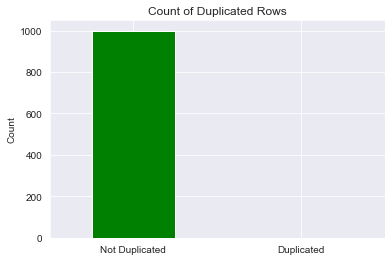

Number of exact duplicated rows: False    999
True       1
dtype: int64


In [47]:
# let us check if there are any exact-duplicated rows, we will ignore the serial number column because it is unique
df_api_copy.duplicated(subset=df_api_copy.columns.difference(['serial_number'])).sum()

# Plot the number of duplicated rows
duplicated_counts = df_api_copy.duplicated(subset=df_api_copy.columns.difference(['serial_number'])).value_counts()
duplicated_counts.plot(kind='bar', color=['green', 'red'])

plt.ylabel('Count')
plt.title('Count of Duplicated Rows')
plt.xticks([0, 1], ['Not Duplicated', 'Duplicated'], rotation=0)
plt.show()

print(f"Number of exact duplicated rows: {duplicated_counts}")

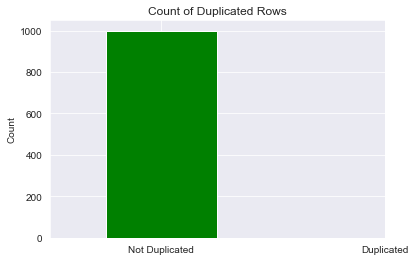

Number of exact duplicated rows: False    999
dtype: int64


In [48]:
# delete the duplicated rows
df_api_copy.drop_duplicates(subset=df_api_copy.columns.difference(['serial_number']), inplace=True)

# validate that there are no duplicated rows using visual assessment
duplicated_counts = df_api_copy.duplicated(subset=df_api_copy.columns.difference(['serial_number'])).value_counts()
duplicated_counts.plot(kind='bar', color=['green', 'red'])

plt.ylabel('Count')
plt.title('Count of Duplicated Rows')
plt.xticks([0, 1], ['Not Duplicated', 'Duplicated'], rotation=0)
plt.show()

print(f"Number of exact duplicated rows: {duplicated_counts}")

### We have finished cleaning the API response dataset, now the data is ready to go to the next step.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

#### Remove unnecessary variables from the `csv` dataset

In [49]:
# let us review the dataset
df_csv_copy.head(10)

,serial_number,list_year,date_recorded,town,address,assessed_value,sale_amount,sales_ratio,property_type,residential_type,non_use_code,assessor_remarks,opm_remarks,location
0,199900001,2017,1999-04-05,New London,184 PEQUOT AVE 309,46690.0,95000.0,0.491400,Condo,Condo,NaN,NaN,NaN,NaN
1,200100001,2017,2001-08-01,Shelton,19 BLACKBERRY LA,390810.0,635000.0,0.615449,Single Family,Single Family,NaN,NaN,NaN,NaN
2,200100002,2017,2001-08-23,Shelton,12 BOYSENBERRY LA,427910.0,558000.0,0.766864,Single Family,Single Family,NaN,NaN,NaN,NaN
3,200100003,2006,2001-09-04,Newington,110 MOYLAN CT,64750.0,88000.0,0.735795,Condo,Condo,NaN,NaN,NaN,POINT (-72.72554 41.7149)
4,200100004,2006,2001-09-05,Newington,48 EVERGREEN RD,166110.0,256000.0,0.648867,Single Family,Single Family,NaN,NaN,NaN,NaN
5,200100005,2006,2001-09-25,Naugatuck,217 OSBORN RD,183850.0,293711.0,0.625955,Single Family,Single Family,NaN,NaN,NaN,POINT (-73.03061 41.47741)
6,200104333,2006,2001-10-27,Greenwich,1010 NORTH ST,573930.0,660000.0,0.869591,Single Family,Single Family,NaN,NaN,NaN,NaN
7,200329976,2006,2003-07-17,Naugatuck,80 GORMAN ST,84200.0,158900.0,0.529893,Single Family,Single Family,NaN,NaN,NaN,NaN
8,200426237,2006,2004-06-05,Bristol,225 TYLER WAY,147320.0,329900.0,0.446560,Single Family,Single Family,NaN,NaN,NaN,NaN
9,200438141,2006,2004-07-27,South Windsor,305 MILL POND DR,113580.0,210000.0,0.540857,Condo,Condo,NaN,NaN,NaN,POINT (-72.58086 41.82519)


In [50]:
# let us drop the unnecessary columns [list_year, non_use_code, assessor_remarks, opm_remarks, location]
df_csv_copy.drop(columns=['list_year','non_use_code', 'assessor_remarks', 'opm_remarks', 'location'], inplace=True)

# let us check the dataset after dropping the columns
df_csv_copy.head(10)

,serial_number,date_recorded,town,address,assessed_value,sale_amount,sales_ratio,property_type,residential_type
0,199900001,1999-04-05,New London,184 PEQUOT AVE 309,46690.0,95000.0,0.491400,Condo,Condo
1,200100001,2001-08-01,Shelton,19 BLACKBERRY LA,390810.0,635000.0,0.615449,Single Family,Single Family
2,200100002,2001-08-23,Shelton,12 BOYSENBERRY LA,427910.0,558000.0,0.766864,Single Family,Single Family
3,200100003,2001-09-04,Newington,110 MOYLAN CT,64750.0,88000.0,0.735795,Condo,Condo
4,200100004,2001-09-05,Newington,48 EVERGREEN RD,166110.0,256000.0,0.648867,Single Family,Single Family
5,200100005,2001-09-25,Naugatuck,217 OSBORN RD,183850.0,293711.0,0.625955,Single Family,Single Family
6,200104333,2001-10-27,Greenwich,1010 NORTH ST,573930.0,660000.0,0.869591,Single Family,Single Family
7,200329976,2003-07-17,Naugatuck,80 GORMAN ST,84200.0,158900.0,0.529893,Single Family,Single Family
8,200426237,2004-06-05,Bristol,225 TYLER WAY,147320.0,329900.0,0.446560,Single Family,Single Family
9,200438141,2004-07-27,South Windsor,305 MILL POND DR,113580.0,210000.0,0.540857,Condo,Condo


#### Remove unnecessary variables from the `api` dataset

In [51]:
# let us review the dataset
df_api_copy.head(10)

,serial_number,list_year,date_recorded,town,address,assessed_value,sale_amount,sales_ratio,property_type,residential_type,non_use_code,remarks,opm_remarks,latitude,longitude
0,202000001,2020,2020-10-05,Andover,303 LAKE RD,121300,210000,0.5776,Residential,Single Family,NaN,NaN,NaN,-72.35327,41.71416
1,202000002,2020,2020-10-15,Andover,78 WINDRUSH LN,181800,275000,0.661090909,Residential,Single Family,NaN,NaN,NaN,NaN,NaN
2,202000003,2020,2020-10-22,Andover,203 BOSTON HILL RD,190200,279900,0.6795,Residential,Single Family,NaN,NaN,NaN,-72.39695,41.72457
3,202000004,2020,2020-11-02,Andover,23 PARKER BRIDGE RD,172900,272000,0.6356,Residential,Single Family,NaN,NaN,NaN,-72.33558,41.73208
4,202000005,2020,2020-11-09,Andover,181 LONG HILL RD,152800,255000,0.5992,Residential,Single Family,NaN,NaN,NaN,NaN,NaN
5,202000006,2020,2020-11-23,Andover,147 WHEELING RD,143200,285000,0.5024,Residential,Single Family,NaN,NaN,NaN,NaN,NaN
6,202000007,2020,2020-11-23,Andover,35 OLD FARMS RD,232600,347900,0.6685,Residential,Single Family,NaN,NaN,NaN,NaN,NaN
7,202000008,2020,2020-12-01,Andover,40 RIDGE RD,186000,270000,0.6888,Residential,Single Family,NaN,NaN,NaN,NaN,NaN
8,202000009,2020,2020-12-01,Andover,12 WEBSTER LN BOLTON,2700,67269,0.040137359,Vacant Land,NaN,17 - Two Towns,THIS IS A 2 TOWN PROPERTY IN BOLTON AND ANDOVER,NaN,-72.42136,41.73088
9,202000010,2020,2020-12-02,Andover,3 GILEAD RD,151700,271000,0.5597,Residential,Single Family,NaN,NaN,NaN,-72.37228,41.72019


In [52]:
# let us drop the unnecessary columns [list_year, non_use_code, remarks, opm_remarks, latitude, longitude]
df_api_copy.drop(columns=['list_year','non_use_code', 'remarks', 'opm_remarks', 'latitude', 'longitude'], inplace=True)

# let us check the dataset after dropping the columns
df_api_copy.head(10)

,serial_number,date_recorded,town,address,assessed_value,sale_amount,sales_ratio,property_type,residential_type
0,202000001,2020-10-05,Andover,303 LAKE RD,121300,210000,0.5776,Residential,Single Family
1,202000002,2020-10-15,Andover,78 WINDRUSH LN,181800,275000,0.661090909,Residential,Single Family
2,202000003,2020-10-22,Andover,203 BOSTON HILL RD,190200,279900,0.6795,Residential,Single Family
3,202000004,2020-11-02,Andover,23 PARKER BRIDGE RD,172900,272000,0.6356,Residential,Single Family
4,202000005,2020-11-09,Andover,181 LONG HILL RD,152800,255000,0.5992,Residential,Single Family
5,202000006,2020-11-23,Andover,147 WHEELING RD,143200,285000,0.5024,Residential,Single Family
6,202000007,2020-11-23,Andover,35 OLD FARMS RD,232600,347900,0.6685,Residential,Single Family
7,202000008,2020-12-01,Andover,40 RIDGE RD,186000,270000,0.6888,Residential,Single Family
8,202000009,2020-12-01,Andover,12 WEBSTER LN BOLTON,2700,67269,0.040137359,Vacant Land,NaN
9,202000010,2020-12-02,Andover,3 GILEAD RD,151700,271000,0.5597,Residential,Single Family


#### Combine the two datasets into one dataset

In [53]:
# let us combine the two datasets into one dataset named df_combined
df_combined = pd.concat([df_csv_copy, df_api_copy], ignore_index=True)

# let us check the dataset after combining the two datasets
df_combined.head(10)

,serial_number,date_recorded,town,address,assessed_value,sale_amount,sales_ratio,property_type,residential_type
0,199900001,1999-04-05,New London,184 PEQUOT AVE 309,46690.0,95000.0,0.4914,Condo,Condo
1,200100001,2001-08-01,Shelton,19 BLACKBERRY LA,390810.0,635000.0,0.615449,Single Family,Single Family
2,200100002,2001-08-23,Shelton,12 BOYSENBERRY LA,427910.0,558000.0,0.766864,Single Family,Single Family
3,200100003,2001-09-04,Newington,110 MOYLAN CT,64750.0,88000.0,0.735795,Condo,Condo
4,200100004,2001-09-05,Newington,48 EVERGREEN RD,166110.0,256000.0,0.648867,Single Family,Single Family
5,200100005,2001-09-25,Naugatuck,217 OSBORN RD,183850.0,293711.0,0.625955,Single Family,Single Family
6,200104333,2001-10-27,Greenwich,1010 NORTH ST,573930.0,660000.0,0.869591,Single Family,Single Family
7,200329976,2003-07-17,Naugatuck,80 GORMAN ST,84200.0,158900.0,0.529893,Single Family,Single Family
8,200426237,2004-06-05,Bristol,225 TYLER WAY,147320.0,329900.0,0.44656,Single Family,Single Family
9,200438141,2004-07-27,South Windsor,305 MILL POND DR,113580.0,210000.0,0.540857,Condo,Condo


### Let us check the combined dataset and make any necessary changes if needed

#### let us check that there is no duplicated rows and the serial_number is unique

In [54]:
# let us check that there is no duplicated rows and the serial_number is unique
df_combined['serial_number'].duplicated().sum()

892

since there is a duplication in the serial_number column, let us fix the duplicated rows and make it as the index of the dataframe

In [55]:
# create a new column for the serial number
df_combined['New Serial Number'] = df_combined['date_recorded'].dt.year.astype(str) + \
                                   df_combined.groupby(df_combined['date_recorded'].dt.year.astype(int)) \
                                       .cumcount().add(1).astype(str).str.zfill(5)

# replace the old serial number column with the new one
df_combined['serial_number'] = df_combined['New Serial Number']

# drop the new serial number column
df_combined.drop(columns=['New Serial Number'], inplace=True)

# set the serial number as the index of the dataframe
df_combined.set_index('serial_number', inplace=True)

# let us check the dataset after modifying the serial number column and setting it as the index of the dataframe
df_combined.head(10)

,date_recorded,town,address,assessed_value,sale_amount,sales_ratio,property_type,residential_type
serial_number,,,,,,,,
199900001,1999-04-05,New London,184 PEQUOT AVE 309,46690.0,95000.0,0.4914,Condo,Condo
200100001,2001-08-01,Shelton,19 BLACKBERRY LA,390810.0,635000.0,0.615449,Single Family,Single Family
200100002,2001-08-23,Shelton,12 BOYSENBERRY LA,427910.0,558000.0,0.766864,Single Family,Single Family
200100003,2001-09-04,Newington,110 MOYLAN CT,64750.0,88000.0,0.735795,Condo,Condo
200100004,2001-09-05,Newington,48 EVERGREEN RD,166110.0,256000.0,0.648867,Single Family,Single Family
200100005,2001-09-25,Naugatuck,217 OSBORN RD,183850.0,293711.0,0.625955,Single Family,Single Family
200100006,2001-10-27,Greenwich,1010 NORTH ST,573930.0,660000.0,0.869591,Single Family,Single Family
200300001,2003-07-17,Naugatuck,80 GORMAN ST,84200.0,158900.0,0.529893,Single Family,Single Family
200400001,2004-06-05,Bristol,225 TYLER WAY,147320.0,329900.0,0.44656,Single Family,Single Family


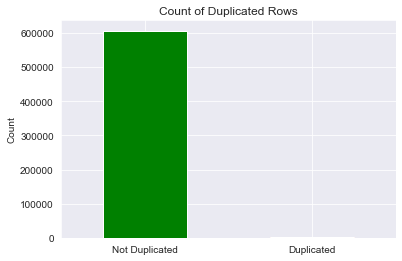

Number of exact duplicated rows: False    606419
True       1362
dtype: int64


In [56]:
# now let us check that there is no duplicated rows in the dataframe
df_combined.duplicated().sum()

# Plot the number of duplicated rows
duplicated_counts = df_combined.duplicated().value_counts()

duplicated_counts.plot(kind='bar', color=['green', 'red'])

plt.ylabel('Count')
plt.title('Count of Duplicated Rows')
plt.xticks([0, 1], ['Not Duplicated', 'Duplicated'], rotation=0)
plt.show()

print(f"Number of exact duplicated rows: {duplicated_counts}")

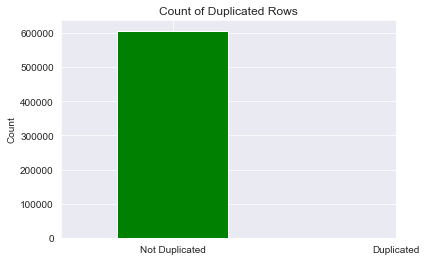

Number of exact duplicated rows: False    606419
dtype: int64


In [57]:
# delete the duplicated rows
df_combined.drop_duplicates(inplace=True)

# validate that there are no duplicated rows using visual assessment
duplicated_counts = df_combined.duplicated().value_counts()

duplicated_counts.plot(kind='bar', color=['green', 'red'])

plt.ylabel('Count')
plt.title('Count of Duplicated Rows')
plt.xticks([0, 1], ['Not Duplicated', 'Duplicated'], rotation=0)
plt.show()

print(f"Number of exact duplicated rows: {duplicated_counts}")

In [58]:
# Update the data types of the columns
df_combined['assessed_value'] = df_combined['assessed_value'].astype(float)
df_combined['sale_amount'] = df_combined['sale_amount'].astype(float)
df_combined['sales_ratio'] = df_combined['sales_ratio'].astype(float)

In [59]:
# let us check the data types of the columns
df_combined.dtypes

date_recorded       datetime64[ns]
town                        object
address                     object
assessed_value             float64
sale_amount                float64
sales_ratio                float64
property_type               object
residential_type            object
dtype: object

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [60]:
# saving the data of the csv dataset to a new csv file,if the file does not exist, it will be created automatically
df_csv_copy.to_csv('Data/Cleaned_Real_Estate_Sales_2001-2020_GL.csv')

# saving the data of the api dataset to a new csv file,if the file does not exist, it will be created automatically
df_api_copy.to_csv('Data/Cleaned_API_Real_Estate_Sales_2021_GL.csv')

# saving the data of the combined dataset to a new csv file,if the file does not exist, it will be created automatically
df_combined.to_csv('Data/Cleaned_Combined_Real_Estate_Sales_2001-2021_GL.csv')

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question: What is the property type that has the highest sale ratio (highest profitable property type)?*

In [61]:
# let's group the data by property type and calculate the mean of the sale ratio
profitable_mean = df_combined.groupby('property_type')['sales_ratio'].mean()

profitable_mean

property_type
Apartments       0.457383
Commercial       0.931245
Condo            0.857839
Four Family      1.420121
Industrial       0.613500
Residential      0.697584
Single Family    8.145756
Three Family     1.411830
Two Family       1.192149
Vacant Land      0.764188
Name: sales_ratio, dtype: float64

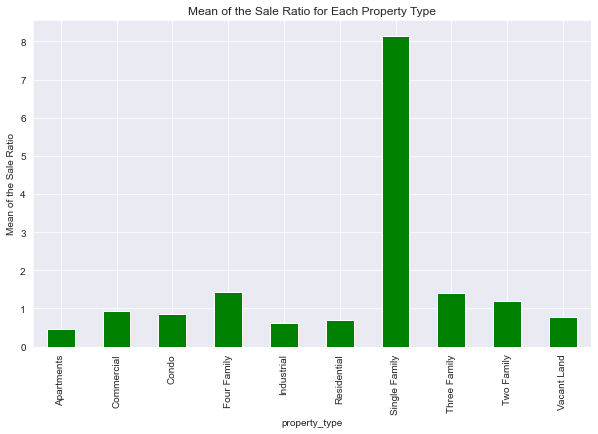

In [62]:
# ---- bar chart ----
# Plot the mean of the sale ratio for each property type
plt.figure(figsize=(10, 6))
profitable_mean.plot(kind='bar', color='green')

# Add labels to the plot and show it
plt.ylabel('Mean of the Sale Ratio')
plt.title('Mean of the Sale Ratio for Each Property Type')
plt.show()

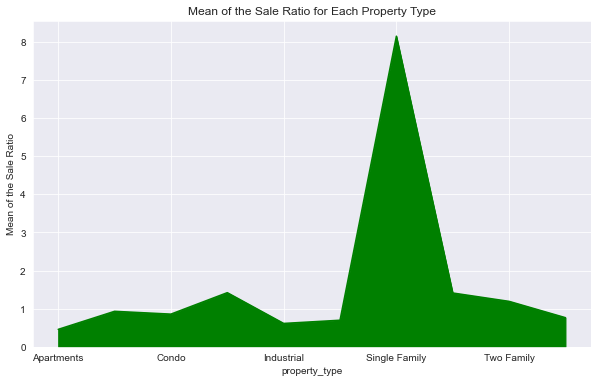

In [63]:
# ---- area chart ----
# let's plot the mean of the sale ratio for each property type
plt.figure(figsize=(10, 6))
profitable_mean.plot(kind='area', color='green')

# Add labels to the plot and show it
plt.ylabel('Mean of the Sale Ratio')
plt.title('Mean of the Sale Ratio for Each Property Type')
plt.show()

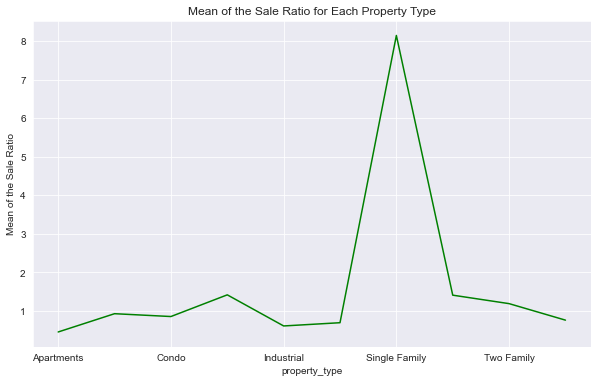

In [64]:
# ---- line chart ----
# let's plot the mean of the sale ratio for each property type
plt.figure(figsize=(10, 6))
profitable_mean.plot(kind='line', color='green')

# Add labels to the plot and show it
plt.ylabel('Mean of the Sale Ratio')
plt.title('Mean of the Sale Ratio for Each Property Type')
plt.show()

*We can see from the above charts that the property type that has the highest sale ratio is the `Single Family Residence` property type with an average sale ratio of 8.145756*

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:*
I would aim to answer research questions like how property type affects the sales price-to-assessment ratio, whether there are geographical patterns in these ratios, and how these ratios evolve over the years. Addressing these aspects would provide a more comprehensive understanding of the real estate market dynamics and the reliability of property assessments. I would also like to explore the relationship between the sales price-to-assessment ratio and the sales price-to-list price ratio. This would help to understand whether the assessment ratio is a good predictor of the sales price-to-list price ratio, which is a common metric used to assess the competitiveness of the real estate market.